In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

csv_path_county = "../data/County_Coordinates.csv"
county_df = pd.read_csv(csv_path_county, delimiter=",",encoding="ANSI")
county_df.head()

,county,state,population,lat,lon,lat_gmap,lon_gmap
0,Abbeville County,sc,16713,34.301500,-82.426750,34.189122,-82.475276
1,Acadia Parish,la,44719,30.249556,-92.393000,30.229735,-92.381362
2,Accomack County,va,33115,37.784250,-75.649750,37.706332,-75.806908
3,Ada County,id,417501,43.607966,-116.273847,43.478767,-116.242030
4,Adair County,ia,4561,41.280000,-94.485500,41.274173,-94.479976


In [2]:
csv_path_clean = "../data/Cleaned_Data.csv"
solar_clean_df = pd.read_csv(csv_path_clean, delimiter=",", encoding="ANSI")
solar_clean_df.head()

,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0,0,0,0.000000,27145011200,70352.78987,Stearns County,569,1690,13,...,39,11,13,34,0,0,25,12,0,9.46
1,2,3,3,64.505776,27145011302,71496.88658,Stearns County,854,1459,31,...,39,11,13,34,0,0,25,12,0,9.46
2,3,0,0,0.000000,27145011304,86840.15275,Stearns County,640,1116,68,...,39,11,13,34,0,0,25,12,0,9.46
3,4,5,5,164.583303,27145011400,89135.31560,Stearns County,654,1314,15,...,39,11,13,34,0,0,25,12,0,9.46
4,5,0,0,0.000000,27145011500,62225.90361,Stearns County,522,1395,24,...,39,11,13,34,0,0,25,12,0,9.46


In [3]:
#create new column for total county income

solar_clean_df["county_household_income"]=solar_clean_df["population"]*solar_clean_df["average_household_income"]
solar_clean_df.head()

,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,...,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate,county_household_income
0,0,0,0,0.000000,27145011200,70352.78987,Stearns County,569,1690,13,...,11,13,34,0,0,25,12,0,9.46,4.627103e+08
1,2,3,3,64.505776,27145011302,71496.88658,Stearns County,854,1459,31,...,11,13,34,0,0,25,12,0,9.46,4.984048e+08
2,3,0,0,0.000000,27145011304,86840.15275,Stearns County,640,1116,68,...,11,13,34,0,0,25,12,0,9.46,5.495245e+08
3,4,5,5,164.583303,27145011400,89135.31560,Stearns County,654,1314,15,...,11,13,34,0,0,25,12,0,9.46,4.692083e+08
4,5,0,0,0.000000,27145011500,62225.90361,Stearns County,522,1395,24,...,11,13,34,0,0,25,12,0,9.46,4.063974e+08


In [4]:
#new groupby object 

grouped_location = solar_clean_df.groupby(["county", "state"])

#create empty dataframe for sorted county and state data

location_df = pd.DataFrame()

#pull in dependent variable data
location_df["tile_count_per1000"]=grouped_location["tile_count"].sum()*1000/grouped_location["population"].sum()
location_df["solar_system_count_per1000"]=grouped_location["solar_system_count"].sum()*1000/grouped_location["population"].sum()
location_df["total_panel_area_per1000"]=grouped_location["total_panel_area"].sum()*1000/grouped_location["population"].sum()

#pull in independent variables on welfare
location_df["average_household_income"]=grouped_location["county_household_income"].sum()/grouped_location["population"].sum()
location_df["per_capita_income"]=grouped_location["per_capita_income"].mean()
location_df["median_household_income"]=grouped_location["median_household_income"].mean()

#pull in independent variables on weather conditions
location_df["daily_solar_radiation"]=grouped_location["daily_solar_radiation"].mean()


#reset index on location_df to ensure county names appear in each row
location_df=location_df.reset_index()
location_df.head()


,county,state,tile_count_per1000,solar_system_count_per1000,total_panel_area_per1000,average_household_income,per_capita_income,median_household_income,daily_solar_radiation
0,Abbeville County,sc,0.179501,0.179501,3.303239,49709.200865,19624.750000,37707.250000,4.31
1,Acadia Parish,la,1.252264,1.028646,51.718155,54859.088846,20804.666667,40660.888889,4.36
2,Accomack County,va,0.241582,0.241582,8.194007,54158.288332,23293.375000,39467.000000,4.37
3,Ada County,id,1.607182,1.293410,46.063401,76074.034496,29962.338983,59137.406780,4.45
4,Adair County,ia,1.096251,1.096251,124.555987,58670.624386,27300.000000,47743.000000,3.94


In [5]:
#merge dataframes by county and state together
new_df=pd.merge(county_df, location_df, how="left", on=["county", "state"])
new_df.head()

,county,state,population,lat,lon,lat_gmap,lon_gmap,tile_count_per1000,solar_system_count_per1000,total_panel_area_per1000,average_household_income,per_capita_income,median_household_income,daily_solar_radiation
0,Abbeville County,sc,16713,34.301500,-82.426750,34.189122,-82.475276,0.179501,0.179501,3.303239,49709.200865,19624.750000,37707.250000,4.31
1,Acadia Parish,la,44719,30.249556,-92.393000,30.229735,-92.381362,1.252264,1.028646,51.718155,54859.088846,20804.666667,40660.888889,4.36
2,Accomack County,va,33115,37.784250,-75.649750,37.706332,-75.806908,0.241582,0.241582,8.194007,54158.288332,23293.375000,39467.000000,4.37
3,Ada County,id,417501,43.607966,-116.273847,43.478767,-116.242030,1.607182,1.293410,46.063401,76074.034496,29962.338983,59137.406780,4.45
4,Adair County,ia,4561,41.280000,-94.485500,41.274173,-94.479976,1.096251,1.096251,124.555987,58670.624386,27300.000000,47743.000000,3.94


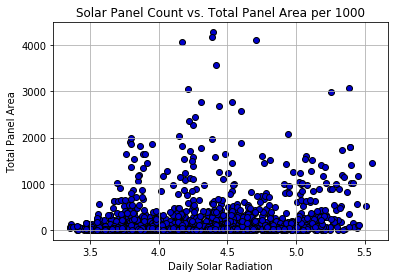

In [6]:
plt.scatter(new_df["daily_solar_radiation"], new_df["total_panel_area_per1000"], marker="o", facecolors="mediumblue", edgecolors="black", alpha=1)
plt.grid()
plt.xlabel("Daily Solar Radiation")
plt.ylabel("Total Panel Area")

plt.title(F"Solar Panel Count vs. Total Panel Area per 1000")

plt.show()


In [7]:
# store the figure in a variable so we can continue to add layers to the same map
fig = gmaps.figure()
coordinates=new_df[['lat_gmap', 'lon_gmap']]
solar_density = new_df["total_panel_area_per1000"].astype(float)

# Create a marker layer using our coordinates
solar_panel_layer = gmaps.heatmap_layer(coordinates, weights=solar_density, dissipating=True)

# Add the layer to the map
fig.add_layer(solar_panel_layer)

# display the figure with the newly added layer
#fig

In [8]:
# Create a variable to store the household income
income = new_df["average_household_income"]

# Normalize the household incomes from 0 to 1 and store that in a new variable
norm_income = (income - min(income)) / (max(income) - min(income))

# view the distribution of normalized bank counts
#norm_income.hist()

In [9]:
income_layer = gmaps.symbol_layer(coordinates, 
    fill_color="green",
    stroke_color='navy',
    fill_opacity=norm_income,
    stroke_opacity=norm_income,
    info_box_content=[f"Income amount: {county}" for county in income]
)

# Create a mapping figure
fig = gmaps.figure()

# Add the layer to the figure
fig.add_layer(income_layer)

# Display the figure
#fig

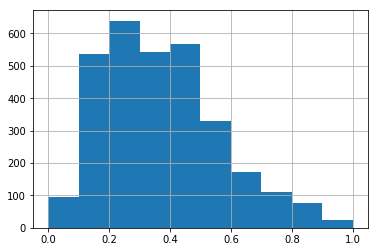

In [10]:
#create a new variable to store average solar radiation

solar_radiation = new_df["daily_solar_radiation"]

# Normalize the average solar radiation from 0 to 1 and store that in a new variable
norm_radiation = (solar_radiation - min(solar_radiation)) / (max(solar_radiation) - min(solar_radiation))

norm_radiation.hist()

In [11]:
radiation_layer = gmaps.symbol_layer(coordinates, 
    fill_color="green",
    stroke_color='navy',
    fill_opacity=norm_radiation,
    stroke_opacity=norm_radiation,
    info_box_content=[f"Daily Radiation: {radiation}" for radiation in solar_radiation]
)

# Create a mapping figure
fig = gmaps.figure()

# Add the layer to the figure
fig.add_layer(radiation_layer)

# Display the figure
#fig

In [15]:
#combined two graphs

# Create and display a map with both layers created above
fig = gmaps.figure()

fig.add_layer(radiation_layer)
fig.add_layer(solar_panel_layer)


fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
new_df.to_csv("../data/Solar_Data.csv", index=False, header=True)